In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score


In [2]:
os.chdir ('C:\\Noble\\Training\\KODO\\2025\\Dec 2025\\Dec 2025 Day 3\\')

In [3]:
df1=pd.read_csv('50_Startups.csv')
print (df1)


    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42  California  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68    New York  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95  California  146121.95
11  100671.96        91790.61        249744.55     Florida  144259.40
12   93863.75       127320.38        249839.44  California  141585.52
13   91992.39       

In [4]:
x= df1.iloc[:, :-1].values 
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'California'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'New York'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'California'],
       [100671.96, 91790.61, 249744.55, 'Florida'],
       [93863.75, 127320.38, 249839.44, 'California'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79

In [5]:
y = df1.iloc[:,4].values
print (y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [6]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
x[:,3]= Label.fit_transform(x[:,3])
print (x)


[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 0]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 2]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 0]
 [100671.96 91790.61 249744.55 1]
 [93863.75 127320.38 249839.44 0]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 2]
 [86419.7 153514.11 0.0 1]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 0]
 [67532.53 105751.03 304768.73 0]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 2]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print (x)


[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 0.0 73994.56 122782.75 3

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size= 0.2)
print (x_train.shape)

(40, 6)


In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit (x_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict (x_test) 
y_pred

array([115033.4078507 , 182100.50127869, 191240.6576384 , 128641.72621488,
        56690.031022  ,  86433.20269118, 155114.5025707 ,  71481.08880814,
        66223.87840706, 115568.20565461])

In [11]:
y_test

array([122776.86, 191050.39, 192261.83, 141585.52,  69758.98,  96712.8 ,
       149759.96,  90708.19,  81229.06, 118474.03])

In [12]:
result = pd.concat([pd.DataFrame(y_pred, columns = ['Prediction']),
                    pd.DataFrame(y_test,columns = ['Y_Test'])], axis =1)
result['Difference']= y_test -y_pred
print (result)


      Prediction     Y_Test    Difference
0  115033.407851  122776.86   7743.452149
1  182100.501279  191050.39   8949.888721
2  191240.657638  192261.83   1021.172362
3  128641.726215  141585.52  12943.793785
4   56690.031022   69758.98  13068.948978
5   86433.202691   96712.80  10279.597309
6  155114.502571  149759.96  -5354.542571
7   71481.088808   90708.19  19227.101192
8   66223.878407   81229.06  15005.181593
9  115568.205655  118474.03   2905.824345


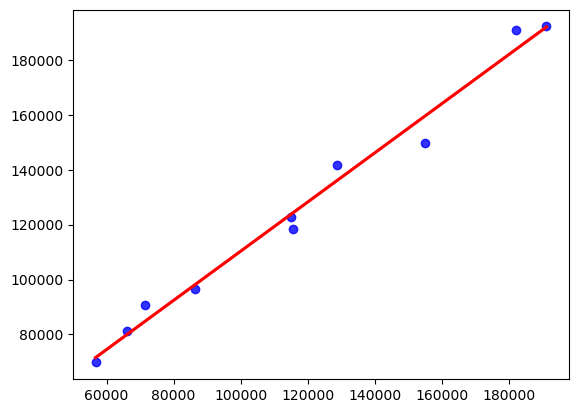

In [13]:

import seaborn as sns
sns.regplot( x = y_pred, y= y_test,scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


In [14]:
accuracy = r2_score(y_test, y_pred)
print (accuracy)


0.9274007823777659
